In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv('./globalterrorismdb_0718dist.csv', encoding='latin_1', low_memory=False)

In [3]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
data.shape 

(181691, 135)

In [5]:
data.isnull().any() 

eventid               False
iyear                 False
imonth                False
iday                  False
approxdate             True
extended              False
resolution             True
country               False
country_txt           False
region                False
region_txt            False
provstate              True
city                   True
latitude               True
longitude              True
specificity            True
vicinity              False
location               True
summary                True
crit1                 False
crit2                 False
crit3                 False
doubtterr              True
alternative            True
alternative_txt        True
multiple               True
success               False
suicide               False
attacktype1           False
attacktype1_txt       False
                      ...  
propextent             True
propextent_txt         True
propvalue              True
propcomment            True
ishostkid           

In [6]:
data = data.dropna(how='any',axis=1)

In [7]:
data.shape

(181691, 29)

In [8]:
data.head(5) 

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1


In [9]:
list(data.columns) 

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'gname',
 'individual',
 'weaptype1',
 'weaptype1_txt',
 'property',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [10]:
data=data.drop(['eventid','extended','vicinity','crit1','crit2','crit3','individual','property','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY'], axis=1) 

In [11]:
list(data.columns) 

['iyear',
 'imonth',
 'iday',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'gname',
 'weaptype1',
 'weaptype1_txt']

In [12]:
# procentual succes of attack 
data['success'].mean()*100

88.95982739926579

In [13]:
# procentual of attack by suicide 
data['suicide'].mean()*100 

3.6507036672152173

In [14]:
country_counts = data['country_txt'].value_counts() 
# Top twenty countries 
country_counts.head(20)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: country_txt, dtype: int64

In [15]:
# Ladder of regions  
region_counts = data['region_txt'].value_counts() 
region_counts.head

<bound method NDFrame.head of Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64>

In [16]:
# Overview of attacktypes  
attacktype_counts = data['attacktype1_txt'].value_counts() 
attacktype_counts.head(5) 

Bombing/Explosion                 88255
Armed Assault                     42669
Assassination                     19312
Hostage Taking (Kidnapping)       11158
Facility/Infrastructure Attack    10356
Name: attacktype1_txt, dtype: int64

In [17]:
# Overview of targets  
targettype_counts = data['targtype1_txt'].value_counts() 
targettype_counts.head 

<bound method NDFrame.head of Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64>

In [18]:
# Top 20 terrorist organisations  
gname_counts = data['gname'].value_counts() 
gname_counts.head(20)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
National Liberation Army of Colombia (ELN)           1561
Tehrik-i-Taliban Pakistan (TTP)                      1351
Palestinians  

In [19]:
# Top 20 terrorist organisations  
weapon_counts = data['weaptype1_txt'].value_counts() 
weapon_counts.head(20)

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [20]:
# Time development  
year_counts = data['iyear'].value_counts() 
year_counts.head(20) 

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
Name: iyear, dtype: int64

In [21]:
type(year_counts) 

pandas.core.series.Series

In [22]:
ready=year_counts.reset_index().rename(columns = {"index": "Year", "iyear":"Number"})

In [23]:
ready.head(5)

,Year,Number
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900


In [24]:
Sorted=ready.sort_values('Year') 
Sorted.head(5) 

,Year,Number
42,1970,651
46,1971,471
44,1972,568
45,1973,473
43,1974,581


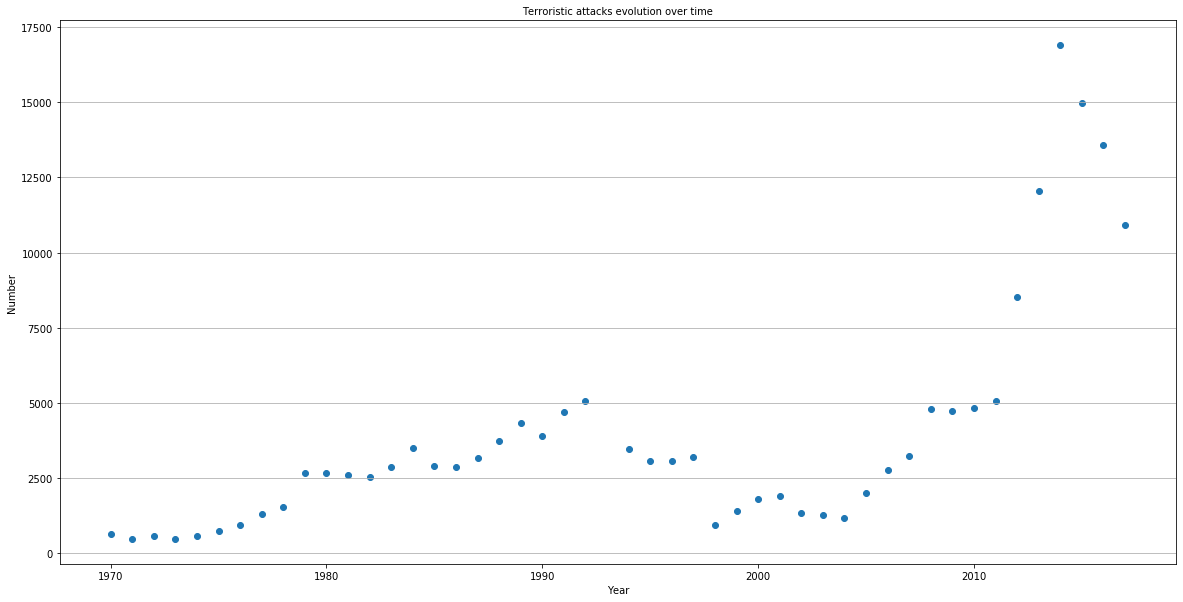

In [25]:
fig, axis = plt.subplots(figsize=(20,10)) 
# Grid lines, Xticks, Xlabel, Ylabel 
 
axis.yaxis.grid(True) 
axis.set_title('Terroristic attacks evolution over time',fontsize=10) 
axis.set_xlabel('Year',fontsize=10) 
axis.set_ylabel('Number',fontsize=10) 
 
X = Sorted['Year'] 
Y = Sorted['Number'] 
#plt.xticks(rotation=90) 
axis.scatter(X, Y) 
plt.show() 

In [26]:
type(weapon_counts) 

pandas.core.series.Series

In [27]:
ready2=weapon_counts.reset_index().rename(columns = {"index": "weapon", "weaptype1_txt":"Number"})  
ready2=ready2.head(6) 
ready2.head(5) 
Typeofweapon = ready2['weapon'].values 

In [28]:
# get the values  
Number = ready2['Number'].values 

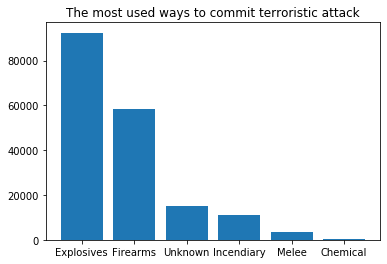

In [29]:
# create 
plt.bar(Typeofweapon,Number) 
plt.title('The most used ways to commit terroristic attack') 
#plt.xticks(rotation=90) 
plt.show() 

In [30]:
explosives=data.groupby('iyear')['weaptype1_txt'].apply(lambda x: (x=='Explosives').sum()).reset_index(name='count') 
 
firearms=data.groupby('iyear')['weaptype1_txt'].apply(lambda x: (x=='Firearms').sum()).reset_index(name='count') 
unknown=data.groupby('iyear')['weaptype1_txt'].apply(lambda x: (x=='Unknown').sum()).reset_index(name='count') 
fire=data.groupby('iyear')['weaptype1_txt'].apply(lambda x: (x=='Incendiary').sum()).reset_index(name='count') 
melee=data.groupby('iyear')['weaptype1_txt'].apply(lambda x: (x=='Melee').sum()).reset_index(name='count') 
chemical=data.groupby('iyear')['weaptype1_txt'].apply(lambda x: (x=='Chemical').sum()).reset_index(name='count') 
years = explosives['iyear'].values 

In [31]:
# get the values  
explosives = explosives['count'].values 
firearms = firearms['count'].values 
fire = fire['count'].values 
melee = melee['count'].values 
chemical = chemical['count'].values 
unknown = unknown['count'].values 

C:\Users\KHALED\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: Second argument 'y1' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\KHALED\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: Second argument 'y2' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  after removing the cwd from sys.path.
C:\Users\KHALED\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: Second argument 'y3' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  """
C:\Users\KHALED\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Second argument 'y4' is ambiguous: could be a color spec but is in data; 

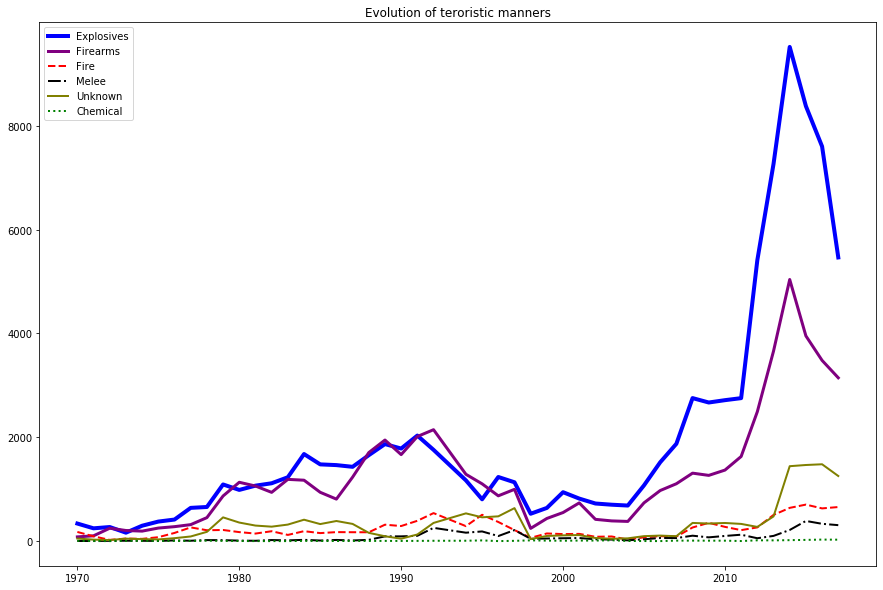

In [32]:
df=pd.DataFrame({'x': years, 'y1': explosives, 'y2': firearms, 'y3': fire, 'y4' : melee, 'y5' :chemical, 'y6' : unknown}) 
plt.figure(figsize=(15,10)) 
plt.plot( 'x', 'y1', data=df, marker='', color='blue', linewidth=4,label="Explosives") 
plt.plot( 'x', 'y2', data=df, marker='', color='purple', linewidth=3,label="Firearms") 
plt.plot( 'x', 'y3', data=df, marker='', color='red', linewidth=2, linestyle='--', label="Fire") 
plt.plot( 'x', 'y4', data=df, marker='', color='black', linewidth=2, linestyle='-.', label="Melee") 
plt.plot( 'x', 'y6', data=df, marker='', color='olive', linewidth=2, linestyle='-', label="Unknown") 
plt.plot( 'x', 'y5', data=df, marker='', color='green', linewidth=2, linestyle=':', label="Chemical") 
plt.title('Evolution of teroristic manners') 
plt.legend()